In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('C:/Users/sava_/OneDrive/Desktop/ALTELE/pt_python/heart (1).csv')

In [26]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
#verificam daca avem valori nule

df.isnull().values.any()

False

<AxesSubplot:>

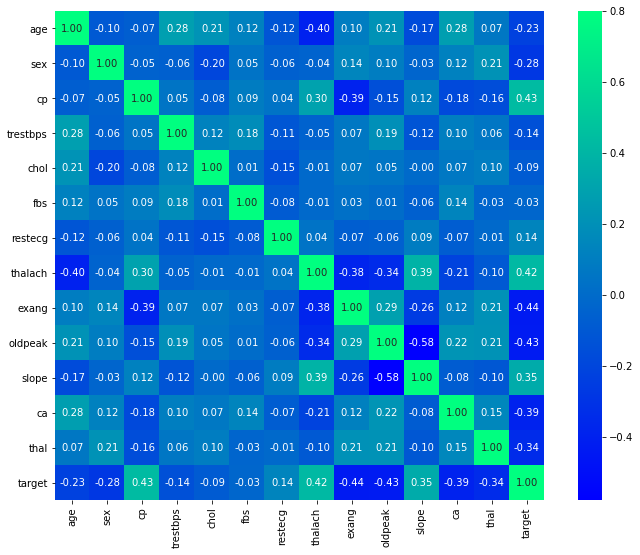

In [28]:
#cautam corelatii daca exista

import seaborn as sns

corr_df=df.corr()
f,ax=plt.subplots(figsize=(12,9))


sns.heatmap(corr_df,vmax=.8,square=True,fmt='.2f',annot=True,cmap='winter')

In [29]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df=pd.get_dummies(df,columns=['sex','fbs','restecg','exang','slope','ca','cp','thal'])

In [31]:
df

#inainte aveam 14 coloane


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,fbs_0,fbs_1,...,ca_3,ca_4,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
300,68,144,193,141,3.4,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [32]:
#scalam celelate coloane carenu sunt categorical features

from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
col_scalat=['age','trestbps','chol','thalach','oldpeak']
df[col_scalat]=StandardScaler.fit_transform(df[col_scalat])

In [33]:
from sklearn.model_selection import train_test_split

x=df.drop('target',axis=1)
y=df['target']

#split 80-20

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
#o sa folosim SVM Classifier si RandomSearch pt cel mai bun varainta de parametrii

from sklearn.svm import LinearSVC

svc=LinearSVC()

from sklearn.model_selection import RandomizedSearchCV

penalties=['l1','l2']
tolerance=[1e-3,1e-4,1e-5]
Cul=[1,0.8,0.6,0.4,0.2]

param_random=[{'penalty':penalties,'tol':tolerance,'C':Cul}]

random=RandomizedSearchCV(LinearSVC(dual=False),param_random,cv=3,n_iter=100)

random.fit(x_train,y_train)

random.best_params_

C:\Users\sava_\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'tol': 0.001, 'penalty': 'l2', 'C': 0.2}

In [39]:
svc=LinearSVC(tol=0.001,penalty='l2',C=0.2)
svc.fit(x_train,y_train)

print('Train score:',svc.score(x_train,y_train))

Train score: 0.8677685950413223


In [42]:
y_pred=svc.predict(x_test)

from sklearn.metrics import accuracy_score

print('Acuratetea:',accuracy_score(y_test,y_pred))

Acuratetea: 0.8852459016393442
